# House Price Prediction

### Import Libraries

In [1]:
# pip install Pandas
# pip install numpy
# pip install matplotlib
# pip instal seaborn
# pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


**LinearRegression:** This class implements ordinary least squares linear regression, which fits a linear model to the data by minimizing the residual sum of squares between the observed and predicted targets.

**Ridge:** This class implements ridge regression, which is a linear regression variant that adds a penalty term to the coefficients to prevent overfitting. Ridge regression is particularly useful when the features are highly correlated or when there are more features than observations.

**Lasso:** This class implements Lasso regression, another variant of linear regression that uses L1 regularization. Lasso regression is similar to ridge regression but tends to produce sparse coefficient vectors by enforcing sparsity on the coefficients, meaning it can perform feature selection by driving some coefficients to zero.

These classes provide different methods for fitting linear models to the data, each with its own advantages and use cases. Depending on the characteristics of your dataset and the goals of your analysis, you may choose one of these regression techniques over the others.

**The RandomForestRegressor** class in scikit-learn is specifically designed for regression tasks. You can use it to fit a random forest regression model to your data, where the model will predict continuous numerical values based on the input features. It offers various parameters for fine-tuning the behavior of the random forest, such as the number of trees in the forest, the maximum depth of the trees, and the minimum number of samples required to split an internal node.

**cross_val_score:** This function performs cross-validation on an estimator (e.g., a machine learning model) by splitting the dataset into multiple folds, training the estimator on each fold, and evaluating its performance on the remaining fold. It returns an array of scores, typically used to assess the model's generalization performance.

**train_test_split:** This function splits the dataset into random train and test subsets. It's commonly used to divide the data into training and testing sets for model evaluation. By splitting the data into a training set (used for model training) and a testing set (used for model evaluation), it allows you to estimate how well your model generalizes to new, unseen data.

**GridSearchCV:** This class performs grid search cross-validation, which is an exhaustive search over a specified parameter grid. It tunes the hyperparameters of an estimator (e.g., a machine learning model) by selecting the best combination of parameters based on cross-validation performance. Grid search is useful for finding the optimal hyperparameters that maximize the performance of the model on unseen data.

These functions and classes provided by scikit-learn's model_selection module are essential for evaluating and fine-tuning machine learning models. They help ensure that the models generalize well to new data and can be optimized for performance.

In [34]:
df=pd.read_csv('houseprice.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Value
### Find columns with missing values and their percent missing     

In [36]:
df.isnull().sum()   

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# Count the number of missing values in each column
miss_val= df.isnull().sum().sort_values(ascending=False)
# Create a new dataframe with the count of missing values
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])
miss_val

,MissvalCount
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [30]:
# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

C:\Users\DELL\AppData\Local\Temp\ipykernel_10372\3499379041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))


,MissvalCount,Percent
PoolQC,1453,319.34
MiscFeature,1406,309.01
Alley,1369,300.88
Fence,1179,259.12
MasVnrType,872,191.65
FireplaceQu,690,151.65
LotFrontage,259,56.92
GarageYrBlt,81,17.80
GarageCond,81,17.80
GarageType,81,17.80


In [31]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [37]:
# drop columns with high missing values
df = df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1) 
# The axis=1 parameter indicates that you're dropping columns (as opposed to rows, which would be axis=0).

In [38]:
#Drop rows with any missing values
df.dropna(inplace=True)

In [39]:
df.shape


(455, 76)

<Axes: xlabel='SalePrice', ylabel='Count'>

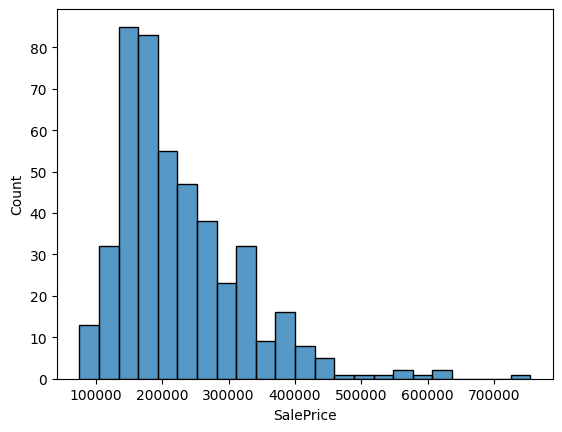

In [40]:
sns.histplot(df.SalePrice)


In [41]:
# Check for non-numeric values in 'SalePrice' column
non_numeric_values = df[~df['SalePrice'].apply(lambda x: isinstance(x, (int, float)))]['SalePrice']
print(non_numeric_values)

Series([], Name: SalePrice, dtype: int64)


In [17]:
# Check for missing values in 'SalePrice' column
missing_values = df['SalePrice'].isna().sum()
print("Number of missing values in 'SalePrice' column:", missing_values)

Number of missing values in 'SalePrice' column: 0


<Axes: xlabel='SalePrice', ylabel='Count'>

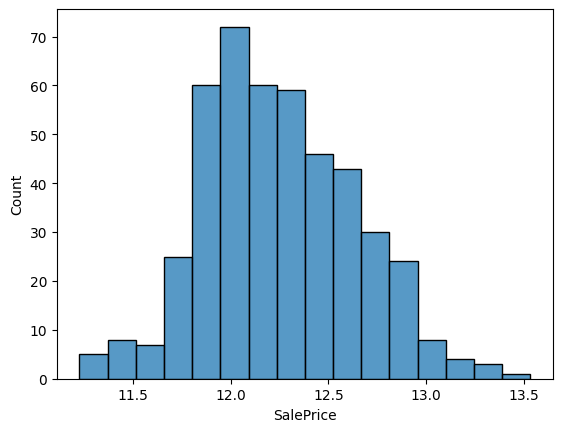

In [44]:
# Take the natural logarithm of 'SalePrice' 
sns.histplot(np.log(df.SalePrice))

In [21]:
# Check for unique values in 'SalePrice' column
unique_values = df['SalePrice'].unique()
print("Unique values in 'SalePrice' column:", unique_values)


Unique values in 'SalePrice' column: [208500 223500 250000 307000 345000 279500 325300 230000 256300 306000
 277500 309000 153000 160000 319900 180500 172500 438780 202500 317000
 226000 244000 185000 144900 193500 153500 245000 126500 260000 164500
  98600 214000  94750 178000 190000 383970 176000 136000 155000 150000
 174000 171000 204000 125000 130000 372402 269500 320000 412500 220000
 325624 215000 163000 184000 211000 501837 153337 311872 274900 145000
 134450 210000 167240 386250 112000 290000 106000 192500 148000 403000
  94500  89500 185500 318000 262500 241500 180000 235000 158000 231500
 276000 151000 175500 139000 415298 192000 228500 207500 244600 167000
 239000 175000 157000 205000 305900 225000 342643 354000 301000 242000
 145250 207000 377426 266000 154000 437154 318061 280000 118000 165000
 132000 394432 179000 191000 426000 169500 241000 258000 339750 149500
 206300 315000 195400  85400 122500 555000 263435 146500 187000 440000
 208900 380000 297000  89471 326000 3740

In [22]:
# Take the natural logarithm of 'SalePrice' and store it in a new column 'LogOfPrice'
df['LogOfPrice'] = np.log(df['SalePrice'])

# Drop the original 'SalePrice' column
df.drop(["SalePrice"], axis=1, inplace=True)


In [23]:
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
skewness = numeric_df.skew().sort_values(ascending=False)
skewness

MiscVal          13.062759
PoolArea         12.559283
3SsnPorch         7.997668
BsmtFinSF2        6.127774
KitchenAbvGr      5.678190
EnclosedPorch     4.848662
BsmtHalfBath      4.290351
LotArea           4.082474
ScreenPorch       3.662176
TotalBsmtSF       2.592187
BsmtFinSF1        2.146508
MasVnrArea        2.128411
GrLivArea         1.895301
OpenPorchSF       1.667232
LotFrontage       1.623360
OverallCond       1.372570
1stFlrSF          1.343134
MSSubClass        1.106013
WoodDeckSF        0.857639
BsmtUnfSF         0.855804
2ndFlrSF          0.852999
TotRmsAbvGrd      0.736877
GarageArea        0.659486
HalfBath          0.472357
Fireplaces        0.335822
LogOfPrice        0.261798
BedroomAbvGr      0.252570
YrSold            0.158343
OverallQual       0.157532
BsmtFullBath      0.151391
MoSold            0.138804
Id                0.055842
LowQualFinSF      0.000000
GarageCars       -0.076837
FullBath         -0.508108
YearBuilt        -0.736565
GarageYrBlt      -0.764004
Y

**Setting Target Variable (y):** <br>
The target variable y represents the variable we want to predict. In this case, it's the logarithm of house prices (LogOfPrice). <br>
**Selecting Predictor Variables (X):**<br>
Predictor variables X are the input features used to predict the target variable. Here, we include only numeric columns as predictors, excluding the target variable.

In [24]:
# Set the target variable (y)
y = df.LogOfPrice  # Target variable is 'LogOfPrice'

# Select only those input features with numeric data type
numeric_features = df.select_dtypes(include=["int64", "float64"])

# Drop the target variable from the selected features to obtain predictor variables (X)
X = numeric_features.drop(["LogOfPrice"], axis=1)  # Predictor variables, excluding 'LogOfPrice'

### Splitting the Dataset:

`train_test_split(X, y, test_size=0.25, random_state=3)`: This function takes four main parameters:
- `X`: The feature matrix containing the independent variables.
- `y`: The target vector containing the dependent variable.
- `test_size`: This parameter specifies the proportion of the dataset that should be included in the test set. In this case, it's set to 0.25, meaning 25% of the data will be reserved for testing.
- `random_state`: This parameter sets the seed for random number generation, ensuring reproducibility. It's set to 3 in this example.

### Returned Values:
The function returns four subsets:
- `X_train`: The training set features.
- `X_test`: The test set features.
- `y_train`: The training set target variable.
- `y_test`: The test set target variable.

### Purpose:
#### Training Set (`X_train`, `y_train`):
These subsets are used to train machine learning models. The model learns patterns from the features (`X_train`) to predict the target variable (`y_train`).

#### Test Set (`X_test`, `y_test`):
These subsets are used to evaluate the performance of the trained model. The model's predictions on the test set are compared with the actual target values (`y_test`) to assess its accuracy and generalization ability.

#### `test_size` Parameter:
Adjusting the `test_size` parameter allows you to control the ratio of training and testing data. Smaller test sizes can result in more training data, potentially leading to better model performance, while larger test sizes provide a more robust evaluation of the model's performance.

#### `random_state` Parameter:
Setting the `random_state` parameter ensures that the data split is deterministic. It allows you to reproduce the same split across multiple runs of the code, which is essential for consistent evaluation and debugging.



In [25]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

In [26]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)
# Fitting the Model:
# - This line fits the linear regression model to the training data. 
#   The `fit()` method estimates the coefficients of the linear regression equation using the training data.
# - `X_train`: The feature matrix containing the independent variables of the training set.
# - `y_train`: The target vector containing the dependent variable of the training set.

LinearRegression()

In [27]:
yr_hat = lr.predict(X_test)
# Predicting with the Model:
# - This line uses the trained linear regression model (`lr`) to make predictions on the test data (`X_test`).
# - The `predict()` method takes the test features (`X_test`) as input and returns the predicted target values (`yr_hat`).

In [28]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)
# Evaluating Model Performance:
# - This line calculates the R-squared score of the linear regression model (`lr`) on the test data (`X_test`, `y_test`).
# - The `score()` method evaluates the model's performance by comparing the predicted target values (`X_test`) to the actual target values (`y_test`).
# - The R-squared score measures the proportion of the variance in the target variable that is predictable from the independent variables. 
#   It ranges from 0 to 1, with higher values indicating better model fit.

Accuracy:  0.8583743620607915


In [29]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())
# Explanation:
# Cross-Validation for Model Evaluation:
# - This line performs cross-validation to evaluate the performance of the linear regression model (`lr`) using the entire dataset (`X`, `y`).
# - The `cross_val_score()` function splits the dataset into 5 folds (`cv=5`) and trains the model on 4 folds while evaluating on the remaining fold.
# - The `scoring='r2'` parameter specifies that the evaluation metric used is the R-squared score, which measures the goodness of fit of the model.
# - The `cross_val_score()` function returns an array of R-squared scores, one for each fold of the cross-validation.

Cross-validation results:  [0.86179324 0.75396783 0.69743321 0.86432327 0.27489253]
R2:  0.6904820157282611
